In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("NASA Exoplanet Data/NASA Exoplanet Archive - Planetary Systems Data.csv")

C:\Users\rex\AppData\Local\Temp\ipykernel_2228\269483816.py:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NASA Exoplanet Data/NASA Exoplanet Archive - Planetary Systems Data.csv")


In [33]:
df = df.fillna(df.mean())

TypeError: can only concatenate str (not "int") to str

In [28]:
features = df[['pl_orbper', 'pl_rade', 'pl_orbsmax','pl_masse', 'pl_orbeccen']]

In [29]:
features = features.fillna(features.mean())

# Normalize the features for better clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [30]:
from sklearn.cluster import KMeans

# Set the number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Choose 2 clusters for "Earth-like" and "non-Earth-like"
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the dataset
df['Cluster'] = clusters


In [31]:
# Summary statistics of each cluster
print(df.groupby('Cluster').mean())

# Check how many planets are in each cluster
print(df['Cluster'].value_counts())


TypeError: agg function failed [how->mean,dtype->object]

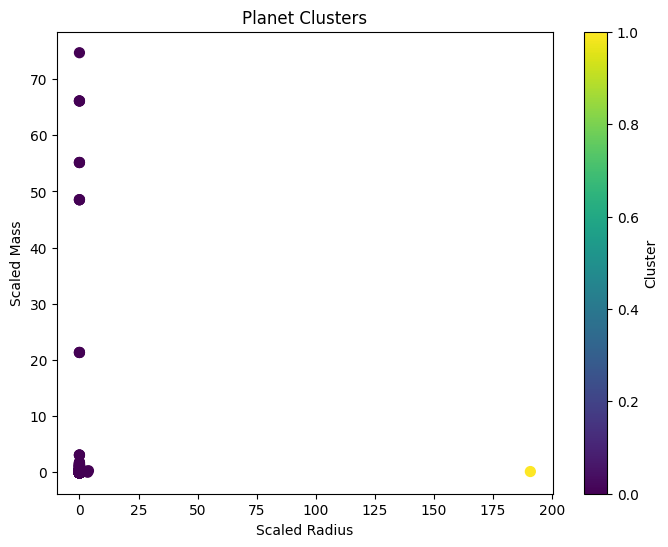

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Scaled Radius')
plt.ylabel('Scaled Mass')
plt.title('Planet Clusters')
plt.colorbar(label='Cluster')
plt.show()

